# Олимпиада Твой Проект

Код для решения кейса

#### Описание дадасета Baza_s_po_corr:  
gender – пол 
<br>about_len – длина описания профиля<br>style – стиль написания описания <br>education – уровень образования<br>height – рост <br>age – возраст <br>smoking – отношение к курению <br>alcohol - отношение к алкоголю<br>children – отношение к детям<br>photo_count – кол-во фотографий в профиле<br>emoji – есть ли в описании профиля стикеры и эмодзи<br>
#### Описание дадасета Baza_s_po_big_five:
introv_extrav – Интроверсия - экстраверсия<br>conservat_opennew – Консерватизм - открытость новому<br>restraint_emotionality – Сдержанность - эмоциональность<br>straightforwardness_benevolence – Прямолинейность - доброжелательность<br>organization_responsibility – Неорганизованность - ответсвенность




In [20]:
import pandas as pd

# Загрузка данных
df_base = pd.read_excel('Baza_s_po_corr.xlsx')
df_big_five = pd.read_excel('Baza_s_po_big_five.xlsx')

# Предварительный осмотр данных
print("🔹 df_base:")
display(df_base.head())
print(df_base.info())

print("\n🔹 df_big_five:")
display(df_big_five.head())
print(df_big_five.info())


🔹 df_base:


,gender,height,education,smoking,alcohol,children,age,about_len,photo_count,style,emoji
0,m,192.0,Среднее,Нейтрально,Нейтрально,"Нет, но хотелось бы",23,100,5,юмор,1
1,m,170.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",34,35,6,юмор,0
2,f,160.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",38,110,6,серьезный тон,0
3,m,194.0,Среднее,Нейтрально,Нейтрально,Нет,27,130,3,юмор,1
4,f,180.0,Среднее,Нейтрально,Нейтрально,NaN,20,29,6,серьезный тон,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       1051 non-null   object 
 1   height       966 non-null    float64
 2   education    872 non-null    object 
 3   smoking      914 non-null    object 
 4   alcohol      856 non-null    object 
 5   children     766 non-null    object 
 6   age          1051 non-null   int64  
 7   about_len    1051 non-null   int64  
 8   photo_count  1051 non-null   int64  
 9   style        1051 non-null   object 
 10  emoji        1051 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 90.4+ KB
None

🔹 df_big_five:


,introv_extrav,conservat_opennew,restraint_emotionality,straightforwardness_benevolence,organization_responsibility
0,1.00,1.000000,0.000000,1.000000,1.00
1,1.00,0.750000,0.333333,0.833333,0.75
2,0.75,0.750000,0.250000,1.000000,1.00
3,0.50,0.666667,0.250000,0.416667,1.00
4,1.00,1.000000,0.250000,1.000000,0.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   introv_extrav                    1051 non-null   float64
 1   conservat_opennew                1051 non-null   float64
 2   restraint_emotionality           1051 non-null   float64
 3   straightforwardness_benevolence  1051 non-null   float64
 4   organization_responsibility      1051 non-null   float64
dtypes: float64(5)
memory usage: 41.2 KB
None


In [21]:
df_base['style'].value_counts()

style
серьезный тон    500
провокация       174
другое           162
юмор             116
самоирония        99
Name: count, dtype: int64

Для корретной работы алгоритмов объединяем df_base и df_big_five, чтобы в дальнейшем не возникло проблем с точностью из-за несвязанности данных между собой


In [22]:
# Объединяем df_base и df_big_five в один датафрейм
df_full = pd.concat([df_base.reset_index(drop=True), df_big_five.reset_index(drop=True)], axis=1)

# Удалим старую strategy, если есть
df_full = df_full.drop(columns=['strategy'], errors='ignore')

print("Форма объединённого датасета:", df_full.shape)

Форма объединённого датасета: (1051, 16)


#### Обработка пропущенных значений
Столбец height — единственный числовой столбец, в котором есть пропуски. Было принято решение заполнить его, чтобы не терять данные и сохранять при этом смысл данных.<br> Почему была выбрана медиана:<br>Медиана отражает центр распределения числового признака. То есть если не известно, какое значение поставить вместо пропущенного — медиана даёт "наиболее вероятный" вариант.<br>Если подставлять среднее или какой-то "особый" маркер вроде -999,
это может создать ненастоящие зависимости, которые модель подхватит как «важные».
А медиана — это значение из реального распределения, и не выделяется на фоне других числовых.<br> Пропуски в категориальных значениях можно заполнить значением «не указано» для сохранения сути.

In [23]:
# 1. Заполним height медианой
df_full['height'] = df_full['height'].fillna(df_full['height'].median())

# 2. Для категориальных признаков заполним «не указано»
fill_value = 'не указано'
for col in ['education', 'smoking', 'alcohol', 'children']:
    df_full[col] = df_full[col].fillna(fill_value)

# Проверим пропуски
print("🔍 Пропуски после обработки:")
print(df_full.isnull().sum())

🔍 Пропуски после обработки:
gender                             0
height                             0
education                          0
smoking                            0
alcohol                            0
children                           0
age                                0
about_len                          0
photo_count                        0
style                              0
emoji                              0
introv_extrav                      0
conservat_opennew                  0
restraint_emotionality             0
straightforwardness_benevolence    0
organization_responsibility        0
dtype: int64


In [27]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Копируем оригинальный датафрейм
df_encoded = df_full.copy()

# 1. Категориальные признаки
cat_cols = ['gender', 'education', 'smoking', 'alcohol', 'children', 'style', 'emoji']

# 2. Преобразуем категориальные признаки с помощью OrdinalEncoder
encoder = OrdinalEncoder()
df_encoded[cat_cols] = encoder.fit_transform(df_encoded[cat_cols])

# 3. Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(columns='strategy', errors='ignore'))

# 4. Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Сохраняем метки кластеров в исходный DataFrame
df_full['strategy'] = clusters

# 6. Распределение по кластерам
print("🔹 Распределение по strategy:")
print(df_full['strategy'].value_counts())

# 7. Анализ главных признаков кластеров
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.drop(columns='strategy', errors='ignore').columns)
top_features_per_cluster = {}

for i in range(4):
    top_features = cluster_centers.loc[i].abs().sort_values(ascending=False)
    top_features_per_cluster[i] = top_features
    print(f"\n📌 Топ признаков для strategy {i}:")
    print(top_features.head(10))  # Показываем топ-10 признаков

# (Опционально) Визуализация кластеров в 2D с помощью PCA


🔹 Распределение по strategy:
strategy
2    429
1    307
0    186
3    129
Name: count, dtype: int64

📌 Топ признаков для strategy 0:
alcohol              1.624193
smoking              1.245974
children             1.097982
education            0.879682
photo_count          0.361822
style                0.290543
about_len            0.255979
introv_extrav        0.178505
emoji                0.156308
conservat_opennew    0.100891
Name: 0, dtype: float64

📌 Топ признаков для strategy 1:
gender                             1.055381
height                             0.750211
restraint_emotionality             0.431014
alcohol                            0.357136
smoking                            0.268396
about_len                          0.255959
organization_responsibility        0.238994
children                           0.206515
straightforwardness_benevolence    0.177353
education                          0.175249
Name: 1, dtype: float64

📌 Топ признаков для strategy 2:
gender       

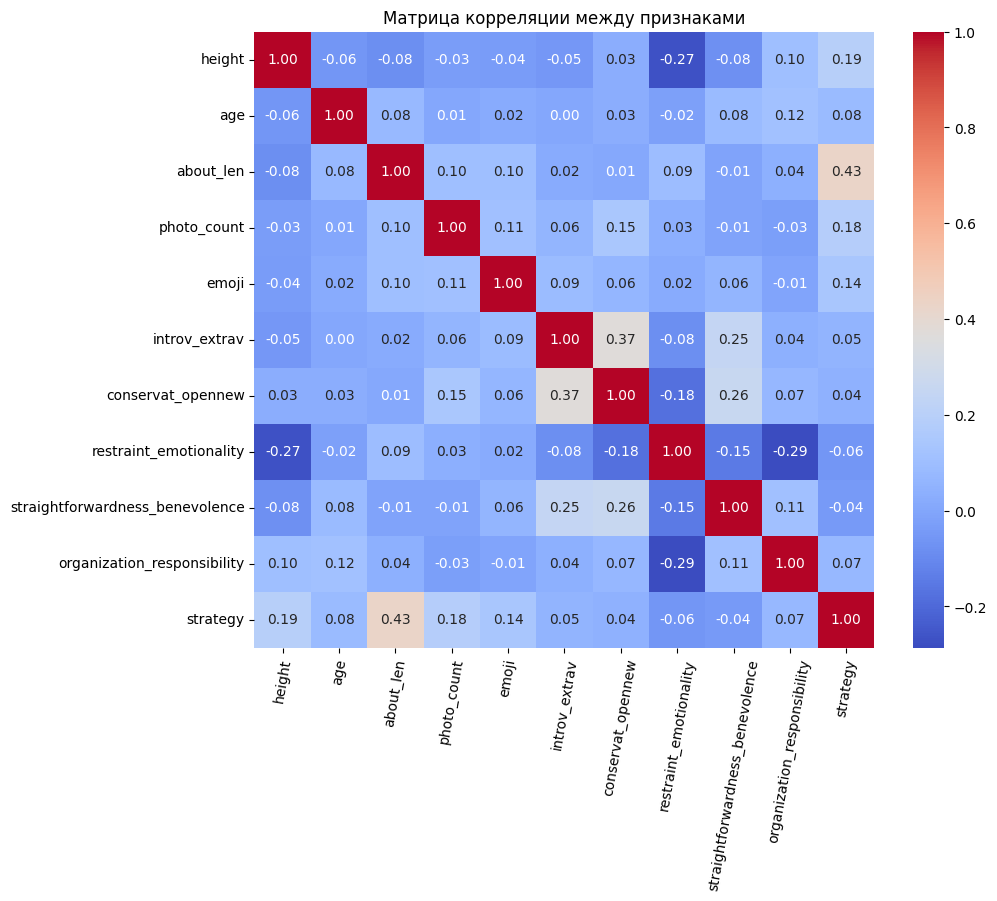

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_full.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции между признаками")
plt.xticks(rotation=80)
plt.show()


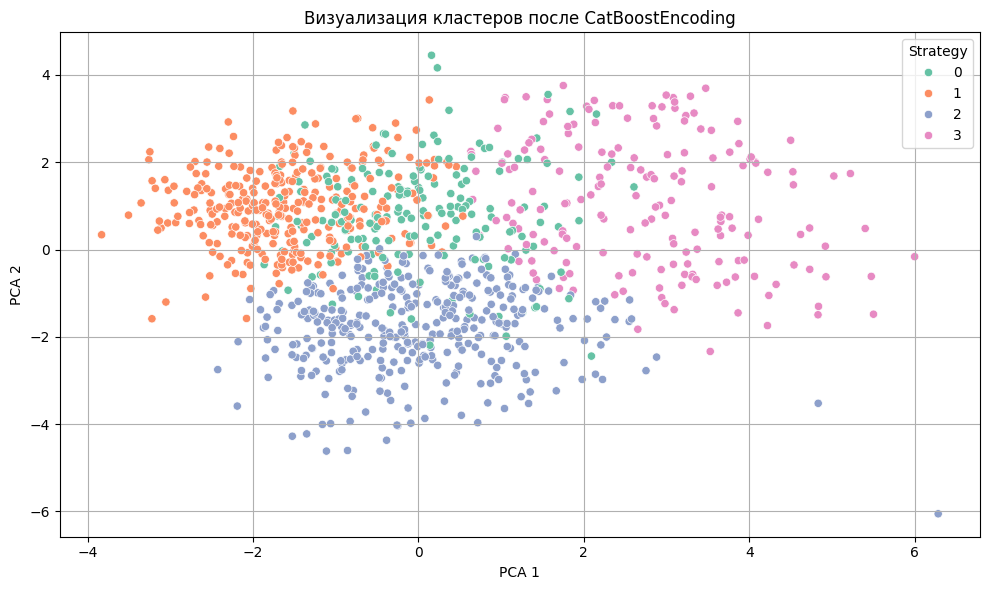

In [19]:
# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Визуализация кластеров после CatBoostEncoding")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Strategy')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Реализация кластеризации
Для этапа кластеризации пользователей по характеристикам профиля был выбран алгоритм KMeans. Данный метод является классическим и хорошо зарекомендовавшим себя инструментом для группировки объектов на основе схожести признаков. <br>
Перед применением метода KMeans был реализован алгоритм кодирования данных One-hot encoding.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Категориальные признаки
cat_cols = ['gender', 'education', 'smoking', 'alcohol', 'children', 'style', 'emoji']

# 2. One-hot encoding
df_encoded = pd.get_dummies(df_full, columns=cat_cols, drop_first=False)

# 3. Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(columns='strategy', errors='ignore'))

# 4. Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Сохраняем метки кластеров в исходный DataFrame
df_full['strategy'] = clusters

# 6. Распределение по кластерам
print("🔹 Распределение по strategy:")
print(df_full['strategy'].value_counts())

# 7. Анализ главных признаков кластеров
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.drop(columns='strategy', errors='ignore').columns)
top_features_per_cluster = {}

for i in range(4):
    top_features = cluster_centers.loc[i].abs().sort_values(ascending=False)
    top_features_per_cluster[i] = top_features
    print(f"\n📌 Топ признаков для strategy {i}:")
    print(top_features)

🔹 Распределение по strategy:
strategy
1    523
3    329
2    177
0     22
Name: count, dtype: int64

📌 Топ признаков для strategy 0:
education_Кандидат наук/PHd        6.839059
education_Высшее                   1.199381
height                             0.820176
smoking_Положительно               0.556485
gender_f                           0.542777
gender_m                           0.542777
education_Среднее                  0.529288
style_юмор                         0.518128
style_серьезный тон                0.497515
education_не указано               0.453073
age                                0.448723
smoking_Нейтрально                 0.353258
restraint_emotionality             0.333376
children_Уже есть                  0.304613
style_самоирония                   0.299972
children_Нет, но хотелось бы       0.255379
alcohol_Положительно               0.232106
children_Нет                       0.188627
organization_responsibility        0.181695
style_другое                   

Визуализация кластеров с PCA (для понимания различий)

In [15]:
df_full

,gender,height,education,smoking,alcohol,children,age,about_len,photo_count,style,emoji,introv_extrav,conservat_opennew,restraint_emotionality,straightforwardness_benevolence,organization_responsibility,strategy,PCA1,PCA2
0,m,192.0,Среднее,Нейтрально,Нейтрально,"Нет, но хотелось бы",23,100,5,юмор,1,1.000000,1.000000,0.000000,1.000000,1.000000,2,-2.685340,1.668150
1,m,170.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",34,35,6,юмор,0,1.000000,0.750000,0.333333,0.833333,0.750000,2,-1.702271,-0.061253
2,f,160.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",38,110,6,серьезный тон,0,0.750000,0.750000,0.250000,1.000000,1.000000,1,-1.123821,-1.234414
3,m,194.0,Среднее,Нейтрально,Нейтрально,Нет,27,130,3,юмор,1,0.500000,0.666667,0.250000,0.416667,1.000000,2,-1.380574,1.544602
4,f,180.0,Среднее,Нейтрально,Нейтрально,не указано,20,29,6,серьезный тон,1,1.000000,1.000000,0.250000,1.000000,0.750000,1,-0.999052,-0.282582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,f,175.0,не указано,Положительно,не указано,не указано,29,20,5,серьезный тон,0,0.833333,0.833333,0.916667,0.250000,0.500000,0,2.976702,-0.664590
1047,m,187.0,Среднее,Нейтрально,Нейтрально,Нет,26,297,3,серьезный тон,1,0.833333,0.250000,1.000000,0.416667,0.000000,3,0.114270,-1.775613
1048,m,175.0,не указано,не указано,не указано,не указано,25,34,6,серьезный тон,0,0.666667,1.000000,0.833333,0.500000,0.416667,0,3.008697,0.601627
1049,m,185.0,не указано,Нейтрально,Нейтрально,"Нет, но хотелось бы",36,63,3,юмор,0,0.916667,0.916667,0.000000,0.916667,0.833333,2,-1.393813,1.990165


как стратегия коррелирует с таргет<br>
В кластеризацию загнать таргет<br>
посмотреть какому типу какая стратегия больше соответствует<br>
Какому типу самопрезентауии соответствует больше цель<br>


В каких стратегия кто преобладает по гендеру<br>
Есть ли зависимость, выбирают ли женщины и мужчины обычно стратегии 1 2 или 3 или только 0, вопрос<br>
для кого более важен интеллектуальный капитал<br>

In [28]:
df_hipo=pd.read_excel('Baza_s_po_corr_target.xlsx')
df_hipo

,gender,height,education,smoking,alcohol,children,age,about_len,target,photo_count,style,emoji
0,m,192.0,Среднее,Нейтрально,Нейтрально,"Нет, но хотелось бы",23,100,Отношения,5,юмор,1
1,m,170.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",34,35,Отношения,6,юмор,0
2,f,160.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",38,110,Отношения,6,серьезный тон,0
3,m,194.0,Среднее,Нейтрально,Нейтрально,Нет,27,130,Свидания,3,юмор,1
4,f,180.0,Среднее,Нейтрально,Нейтрально,NaN,20,29,Отношения,6,серьезный тон,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,f,NaN,NaN,Положительно,NaN,NaN,29,20,Дружба,5,серьезный тон,0
1047,m,187.0,Среднее,Нейтрально,Нейтрально,Нет,26,297,Дружба,3,серьезный тон,1
1048,m,NaN,NaN,NaN,NaN,NaN,25,34,Отношения,6,серьезный тон,0
1049,m,185.0,NaN,Нейтрально,Нейтрально,"Нет, но хотелось бы",36,63,Отношения,3,юмор,0


In [29]:
# 1. Заполним height медианой
df_hipo['height'] = df_hipo['height'].fillna(df_hipo['height'].median())

# 2. Для категориальных признаков заполним «не указано»
fill_value = 'не указано'
for col in ['education', 'smoking', 'alcohol', 'children', 'target']:
    df_hipo[col] = df_hipo[col].fillna(fill_value)

# Проверим пропуски
print("🔍 Пропуски после обработки:")
print(df_hipo.isnull().sum())

🔍 Пропуски после обработки:
gender         0
height         0
education      0
smoking        0
alcohol        0
children       0
age            0
about_len      0
target         0
photo_count    0
style          0
emoji          0
dtype: int64


In [30]:
df_full['target'] = df_hipo['target']

In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

# Создаём кросс-таблицу
crosstab = pd.crosstab(df_full['strategy'], df_full['target'])

# Покажем таблицу
print("Кросс-таблица стратегия vs цель:")
print(crosstab)

# Применяем тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"\nχ² = {chi2:.3f}, p-value = {p:.5f}")

if p < 0.05:
    print("✅ Есть статистически значимая связь между стратегией и целью.")
else:
    print("⚠️ Нет статистически значимой связи между стратегией и целью.")


Кросс-таблица стратегия vs цель:
target    Дружба  Общение без конкретики  Отношения  Путешествовать вместе  \
strategy                                                                     
0              3                       2          7                      0   
1             37                     100        191                      3   
2             15                      27         50                      0   
3             26                      47        145                      1   

target    Свидания  не указано  
strategy                        
0                9           1  
1              142          50  
2               57          28  
3               77          33  

χ² = 25.689, p-value = 0.04142
✅ Есть статистически значимая связь между стратегией и целью.


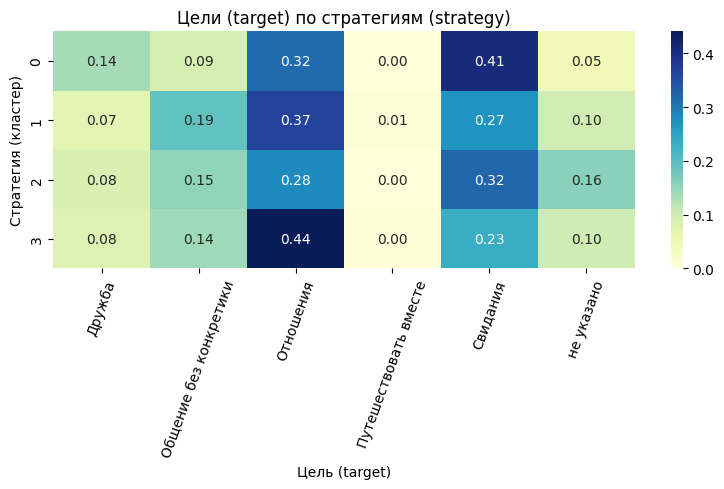

In [36]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 👇 Частота целей по стратегиям (кластерным меткам)
cross_tab = pd.crosstab(df_full['strategy'], df_full['target'], normalize='index')

# 🔥 Визуализация — как цели распределяются по стратегиям
plt.figure(figsize=(8, 5))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Цели (target) по стратегиям (strategy)')
plt.xlabel('Цель (target)')
plt.ylabel('Стратегия (кластер)')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


In [37]:
# Распределение по полу внутри каждой стратегии
gender_strategy = pd.crosstab(df_full['strategy'], df_full['gender'], normalize='index') * 100
print(gender_strategy.round(2))


gender        f      m
strategy              
0         18.18  81.82
1         42.83  57.17
2         51.41  48.59
3         47.42  52.58


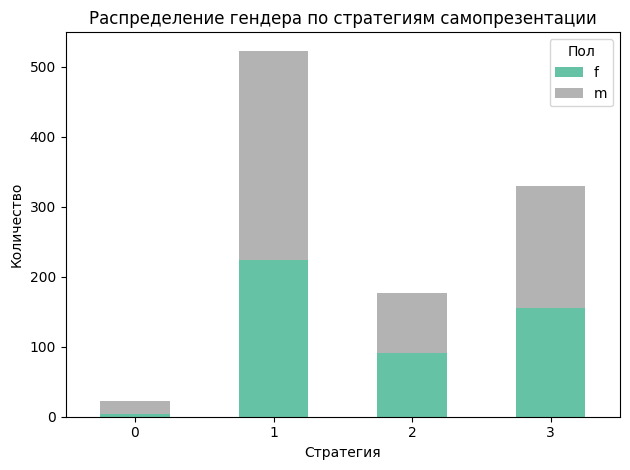

χ² = 11.08, p-value = 0.01130
✅ Есть статистически значимая связь между полом и стратегией.


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Распределение по полу и стратегиям
gender_strategy_ct = pd.crosstab(df_full['strategy'], df_full['gender'])

# Визуализация
gender_strategy_ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Распределение гендера по стратегиям самопрезентации')
plt.xlabel('Стратегия')
plt.ylabel('Количество')
plt.legend(title='Пол')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Проверка зависимости: chi2
chi2, p, dof, expected = chi2_contingency(gender_strategy_ct)

print(f"χ² = {chi2:.2f}, p-value = {p:.5f}")
if p < 0.05:
    print("✅ Есть статистически значимая связь между полом и стратегией.")
else:
    print("⚠️ Нет статистически значимой связи между полом и стратегией.")


C:\Users\masik-saar\AppData\Local\Temp\ipykernel_21252\1164061094.py:8: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  edu_by_strategy_gender.plot(kind='bar',color=colors, colormap='Pastel1', edgecolor='black')
C:\Users\masik-saar\AppData\Local\Temp\ipykernel_21252\1164061094.py:8: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  edu_by_strategy_gender.plot(kind='bar',color=colors, colormap='Pastel1', edgecolor='black')


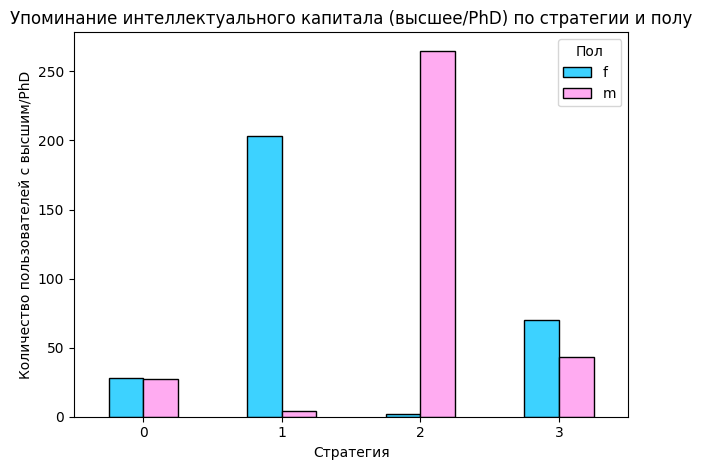

In [14]:
# Группируем по стратегии и полу
edu_by_strategy_gender = df_full[df_full['education'].isin(['Высшее', 'Кандидат наук/PHd'])] \
    .groupby(['strategy', 'gender'])['education'].count().unstack()

colors = ['#3dd2ff', '#ffabf1']  # порядок должен соответствовать столбцам: 'm', 'f

# Визуализация
edu_by_strategy_gender.plot(kind='bar',color=colors, colormap='Pastel1', edgecolor='black')
plt.title('Упоминание интеллектуального капитала (высшее/PhD) по стратегии и полу')
plt.xlabel('Стратегия')
plt.ylabel('Количество пользователей с высшим/PhD')
plt.legend(title='Пол')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


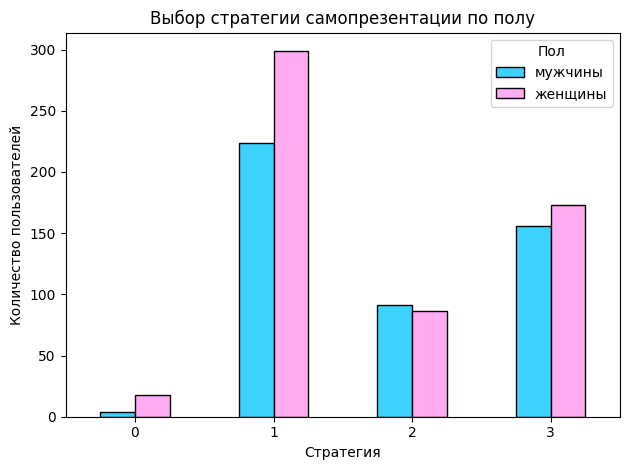

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчёт количества мужчин и женщин в каждой стратегии
strategy_gender_counts = df_full.groupby(['strategy', 'gender']).size().unstack().fillna(0)

# Задаём цвета вручную
colors = ['#3dd2ff', '#ffabf1']  # порядок должен соответствовать столбцам: 'm', 'f'

# Визуализация
strategy_gender_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Выбор стратегии самопрезентации по полу')
plt.xlabel('Стратегия')
plt.ylabel('Количество пользователей')
plt.legend(title='Пол', labels=['мужчины', 'женщины'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [31]:
df_full

,gender,height,education,smoking,alcohol,children,age,about_len,photo_count,style,emoji,introv_extrav,conservat_opennew,restraint_emotionality,straightforwardness_benevolence,organization_responsibility,strategy,target
0,m,192.0,Среднее,Нейтрально,Нейтрально,"Нет, но хотелось бы",23,100,5,юмор,1,1.000000,1.000000,0.000000,1.000000,1.000000,1,Отношения
1,m,170.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",34,35,6,юмор,0,1.000000,0.750000,0.333333,0.833333,0.750000,1,Отношения
2,f,160.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",38,110,6,серьезный тон,0,0.750000,0.750000,0.250000,1.000000,1.000000,1,Отношения
3,m,194.0,Среднее,Нейтрально,Нейтрально,Нет,27,130,3,юмор,1,0.500000,0.666667,0.250000,0.416667,1.000000,1,Свидания
4,f,180.0,Среднее,Нейтрально,Нейтрально,не указано,20,29,6,серьезный тон,1,1.000000,1.000000,0.250000,1.000000,0.750000,1,Отношения
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,f,175.0,не указано,Положительно,не указано,не указано,29,20,5,серьезный тон,0,0.833333,0.833333,0.916667,0.250000,0.500000,2,Дружба
1047,m,187.0,Среднее,Нейтрально,Нейтрально,Нет,26,297,3,серьезный тон,1,0.833333,0.250000,1.000000,0.416667,0.000000,1,Дружба
1048,m,175.0,не указано,не указано,не указано,не указано,25,34,6,серьезный тон,0,0.666667,1.000000,0.833333,0.500000,0.416667,2,Отношения
1049,m,185.0,не указано,Нейтрально,Нейтрально,"Нет, но хотелось бы",36,63,3,юмор,0,0.916667,0.916667,0.000000,0.916667,0.833333,1,Отношения


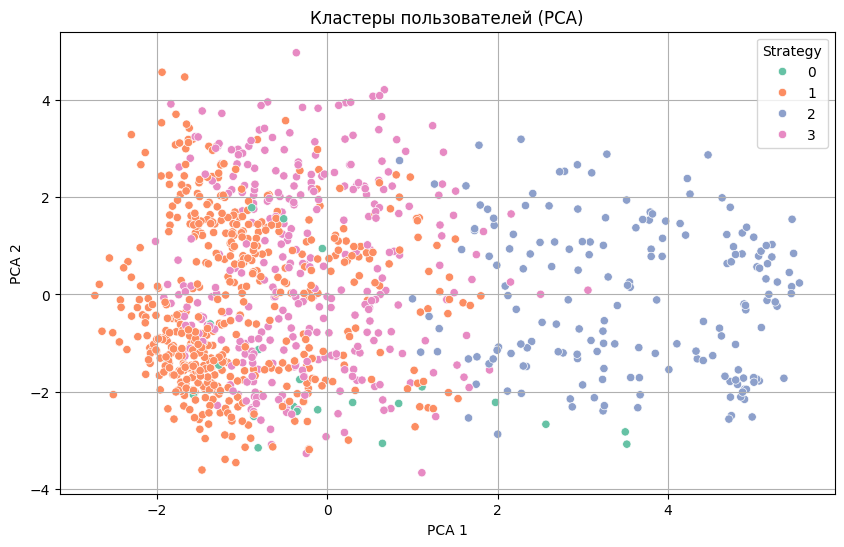

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_full['strategy'], palette='Set2')
plt.title("Кластеры пользователей (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Strategy")
plt.grid(True)
plt.show()


Создаем df_ML_final из уже закодированного df_encoded

In [8]:
# Создаем df_ML_final из уже закодированного df_encoded
df_encoded['strategy'] = df_full['strategy'].values
df_ML_final = df_encoded.copy()

Дополнительные графики для визуализации полученных кластеров и связей их признаков

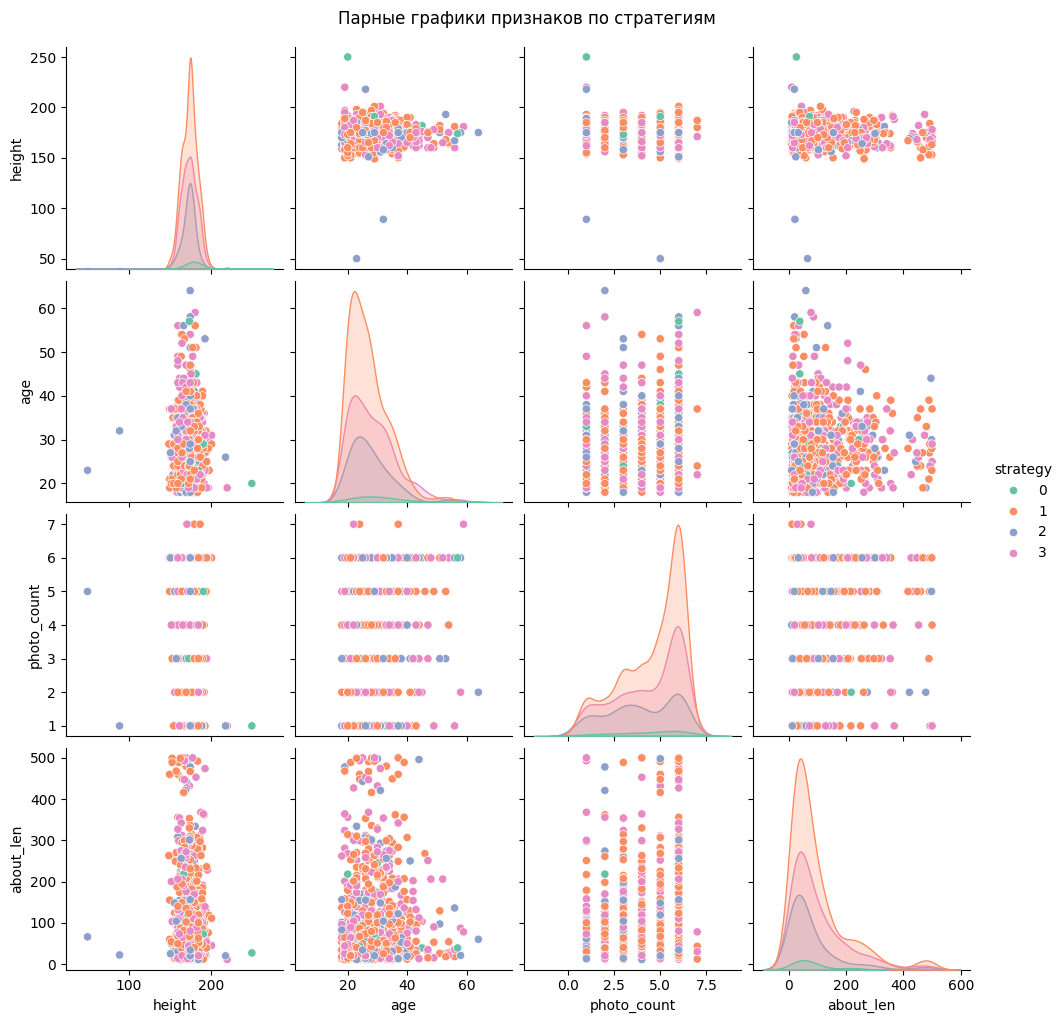

In [9]:
# Выберем несколько признаков + strategy
selected_cols = ['height', 'age', 'photo_count', 'about_len', 'strategy']
df_plot = df_full[selected_cols].copy()

# Pairplot
sns.pairplot(df_plot, hue='strategy', palette='Set2', diag_kind='kde')
plt.suptitle("Парные графики признаков по стратегиям", y=1.02)
plt.show()

Визуализация распределения возраста по стратегиям

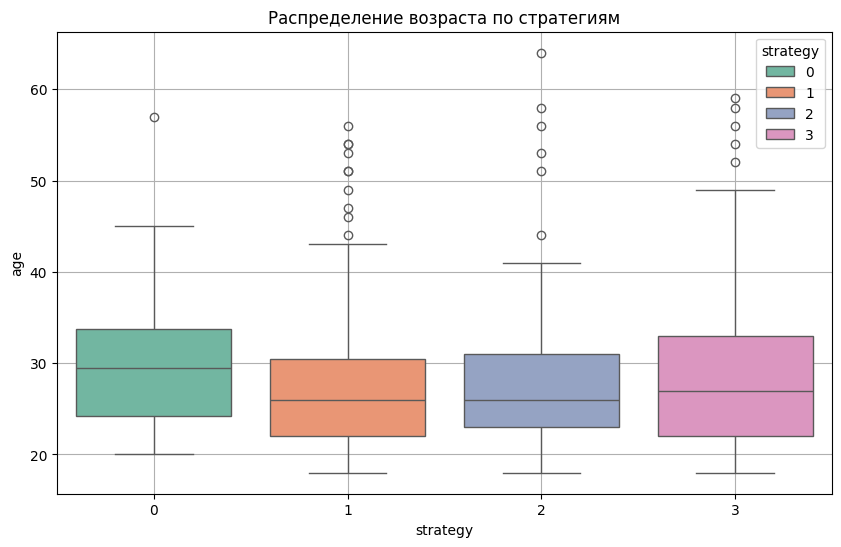

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='age', hue='strategy', data=df_full, palette='Set2')
plt.title("Распределение возраста по стратегиям")
plt.grid(True)
plt.show()

Построение матрицы корреляции признаков

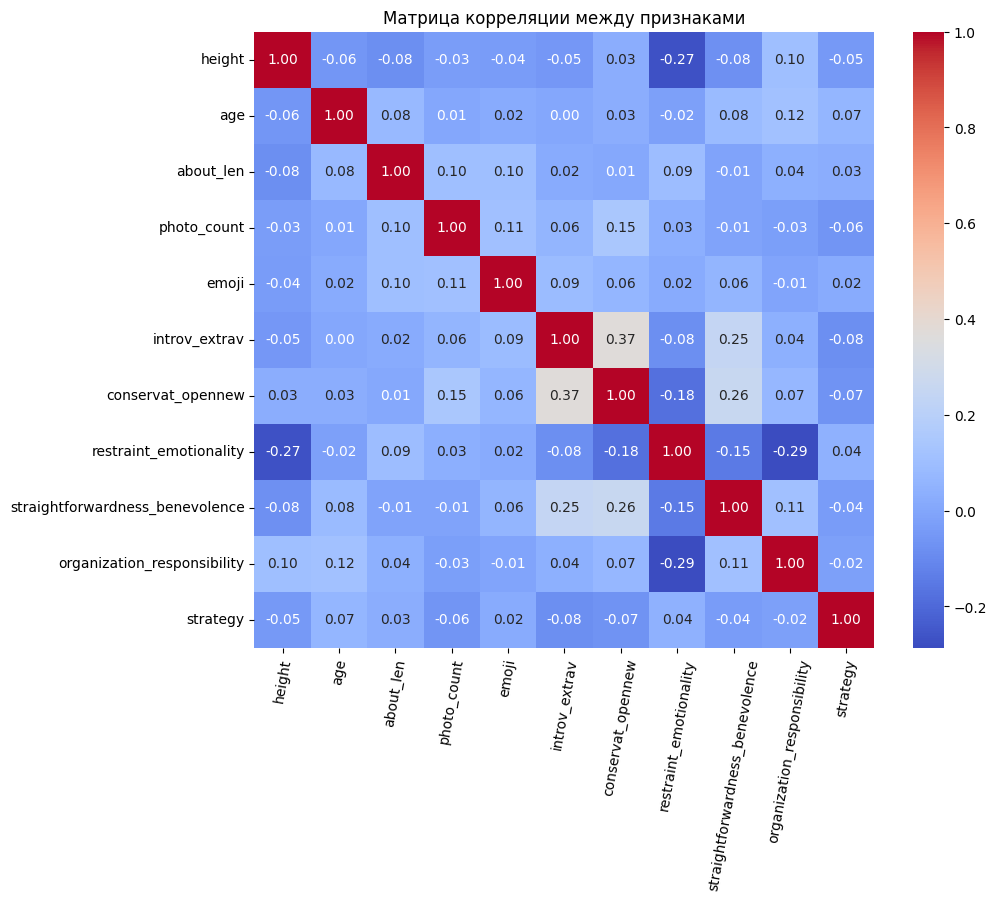

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_full.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции между признаками")
plt.xticks(rotation=80)
plt.show()


### CatBoost
Реализуем алгоритм CatBoost. <br> Данный алгоритм был выбран так как он может хорошо обрабатывать датасеты с категориальными признаками.

In [12]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# Категориальные признаки (передаём как есть, без one-hot)
cat_cols = ['gender', 'education', 'smoking', 'alcohol', 'children', 'style', 'emoji']

# Разделяем признаки и целевую переменную
df_full['strategy'] = df_encoded['strategy'].values
X = df_full.drop(columns='strategy')
y = df_full['strategy']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Обучение CatBoost
model = CatBoostClassifier(verbose=0, random_seed=42)

# Указываем, какие признаки категориальные
model.fit(X_train, y_train, cat_features=cat_cols)

# Предсказания и метрики
y_pred = model.predict(X_test)
print("🎯 CatBoost accuracy:", accuracy_score(y_test, y_pred))
print("\nОтчёт по классам (CatBoost):")
print(classification_report(y_test, y_pred, zero_division=0))


🎯 CatBoost accuracy: 0.990521327014218

Отчёт по классам (CatBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.98      0.99       105
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.99        66

    accuracy                           0.99       211
   macro avg       0.99      1.00      0.99       211
weighted avg       0.99      0.99      0.99       211



### Random Forest
Реализуем алгоритм CatBoost. <br> Был выбран так как является универсальным алгоритмом. Количество деревьев 10

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Те же X и y
X = df_encoded.drop(columns='strategy')
y = df_encoded['strategy']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Random Forest (10 деревьев по умолчанию)
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_model.predict(X_test)

# Метрики
print("🌲 Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nОтчёт по классам (Random Forest):")
print(classification_report(y_test, y_pred_rf, zero_division=0))


🌲 Random Forest accuracy: 0.966824644549763

Отчёт по классам (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.98      0.98      0.98       105
           2       0.97      0.94      0.96        36
           3       0.94      0.98      0.96        66

    accuracy                           0.97       211
   macro avg       0.97      0.85      0.89       211
weighted avg       0.97      0.97      0.97       211



### Проверка на переобучение моделей.
Проверка проводилась методом Кросс-валидации.

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier

# Модель
model = CatBoostClassifier(verbose=0, random_seed=42)

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Результаты
print("📊 Accuracy по фолдам:", scores)
print("🎯 Средняя accuracy:", scores.mean())


📊 Accuracy по фолдам: [0.99526066 0.99047619 1.         1.         0.98095238]
🎯 Средняя accuracy: 0.9933378469871361


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Модель
rf_model = RandomForestClassifier(random_state=42)

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

# Результаты
print("🌲 Accuracy по фолдам (Random Forest):", rf_scores)
print("🎯 Средняя accuracy:", rf_scores.mean())


🌲 Accuracy по фолдам (Random Forest): [0.97630332 0.97142857 0.99047619 0.97142857 0.97619048]
🎯 Средняя accuracy: 0.977165425411871


In [16]:
### The end! (^・ω・^ )~~~~~~